# Full Adder

[Back](https://mark1626.github.io/knowledge/)

In [1]:
import numpy as np
from qiskit import QuantumCircuit

## Circuit

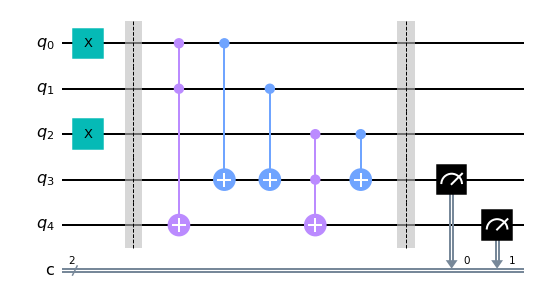

In [2]:
c = QuantumCircuit(5, 2)

# A = 1, B = 0, Cin = 1
c.x([0, 2])

c.barrier()
c.ccx(0, 1, 4)
c.cx(0, 3)
c.cx(1, 3)
c.ccx(2, 3, 4)
c.cx(2, 3)
c.barrier()

c.measure([3, 4], [0, 1])

c.draw("mpl")

## Simulation

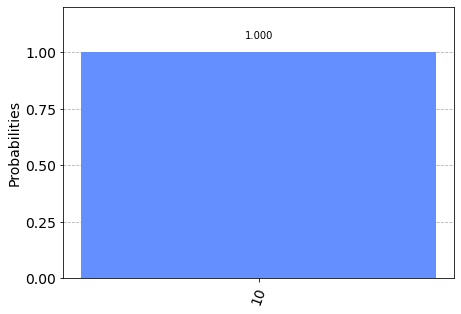

In [3]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

backend = QasmSimulator()
compilation = transpile(c, backend)

job = backend.run(compilation, shots = 1024)

result = job.result()
counts = result.get_counts(compilation)
plot_histogram(counts)